* 拡張ディッキー・フラー検定
* 時系列のサンプルデータ（確率過程の生成値）が、単位根過程（非定常過程）であるかどうかを調べたい時に利用する検定
* 帰無仮説「非定常過程である」
    * 非定常過程であることを棄却し、定常過程であるとみなしてよいかどうかを確認する

In [11]:
import numpy as np
import pandas as pd

# https://stackoverflow.com/questions/50394873/import-pandas-datareader-gives-importerror-cannot-import-name-is-list-like
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like

import matplotlib
import matplotlib.pylab as plt
from pandas_datareader import data, wb
from statsmodels.tsa import stattools

In [12]:
# データ

start = "2016-08-01"
end = "2017-08-01"
price = data.DataReader("NIKKEI225", "fred", start, end) # 日経平均株価 from セントルイス連邦準備銀行
display(price.head(5))

,NIKKEI225
DATE,
2016-08-01,16635.77
2016-08-02,16391.45
2016-08-03,16083.11
2016-08-04,16254.89
2016-08-05,16254.45


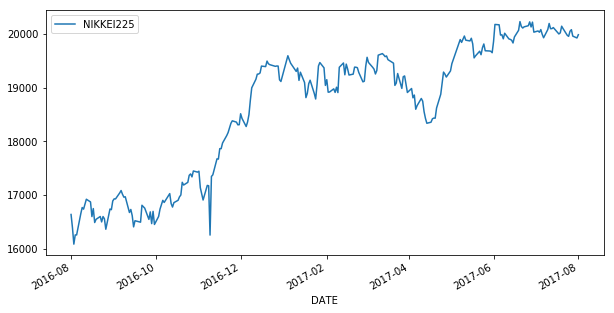

In [14]:
# 原系列プロット

price_tmp = price.dropna()
price_tmp.plot(figsize=(10,5))
plt.show()

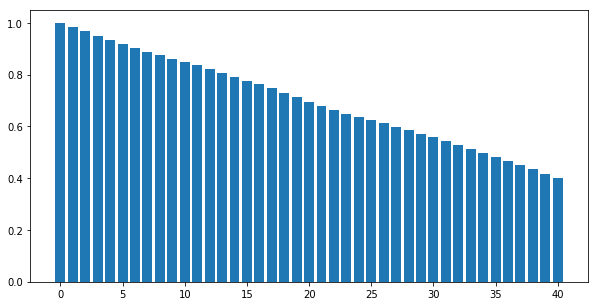

In [15]:
# 原系列における自己相関係数

price_tmp = price.dropna()
acf = stattools.acf(price_tmp)
plt.figure(figsize=(10,5))
plt.bar(range(len(acf)), acf)
plt.show()

In [16]:
# 原系列に対する拡張ディッキー-フラー（ADF）検定

price_tmp = price.dropna()
res_ctt = stattools.adfuller(price_tmp["NIKKEI225"], regression="ctt") # トレンド項あり（２次）、定数項あり
res_ct = stattools.adfuller(price_tmp["NIKKEI225"], regression="ct") # トレンド項あり（１次）、定数項あり
res_c = stattools.adfuller(price_tmp["NIKKEI225"], regression="c") # トレンド項なし、定数項あり
res_nc = stattools.adfuller(price_tmp["NIKKEI225"], regression="nc") # トレンド項なし、定数項なし
print(res_ctt) # index 1 is p-value
print(res_ct)
print(res_c)
print(res_nc)

(-2.6708678219785402, 0.4709510156594118, 1, 245, {'1%': -4.419048225025287, '5%': -3.856711021105152, '10%': -3.568289644722862}, 3022.9312013403046)
(-2.093523132673803, 0.5497217494871595, 1, 245, {'1%': -3.996204153626465, '5%': -3.428563622657226, '10%': -3.1376703806237196}, 3023.2796069397737)
(-1.465787174453005, 0.5503629828822104, 1, 245, {'1%': -3.4573260719088132, '5%': -2.873410402808354, '10%': -2.573095980841316}, 3023.332617028609)
(1.3888258295690679, 0.958418587844728, 1, 245, {'1%': -2.5749261391087046, '5%': -1.9421502633766543, '10%': -1.6157794081377657}, 3024.1825324119814)


* いずれもp-valueが高く、帰無仮説「非定常過程である」を棄却できない

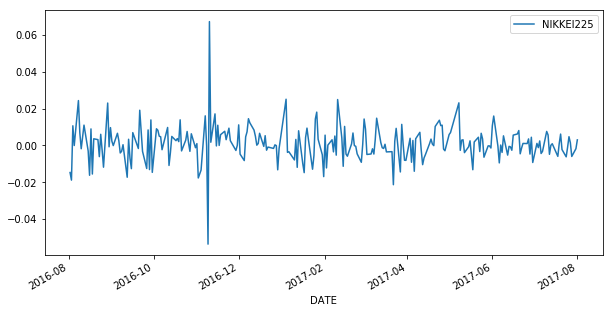

In [17]:
# 差分系列プロット

price_tmp = price.dropna()
price_tmp = price_tmp.pct_change().dropna()
price_tmp.plot(figsize=(10,5))
plt.show()

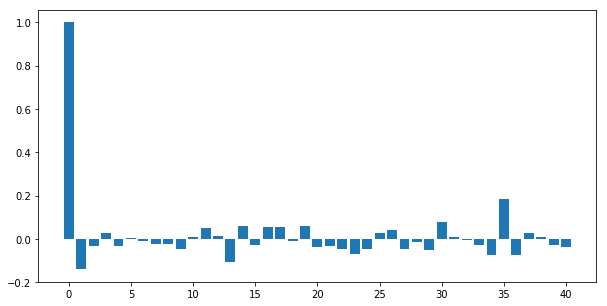

In [18]:
# 差分系列における自己相関係数

price_tmp = price.dropna()
price_tmp = price_tmp.diff().dropna()
acf = stattools.acf(price_tmp)
plt.figure(figsize=(10,5))
plt.bar(range(len(acf)), acf)
plt.show()

In [19]:
# 差分系列に対するADF検定

price_tmp = price.dropna()
price_tmp = price_tmp.diff().dropna()
res_ctt = stattools.adfuller(price_tmp["NIKKEI225"], regression="ctt") # トレンド項あり（２次）、定数項あり
res_ct = stattools.adfuller(price_tmp["NIKKEI225"], regression="ct") # トレンド項あり（１次）、定数項あり
res_c = stattools.adfuller(price_tmp["NIKKEI225"], regression="c") # トレンド項なし、定数項あり
res_nc = stattools.adfuller(price_tmp["NIKKEI225"], regression="nc") # トレンド項なし、定数項なし
print(res_ctt)
print(res_ct)
print(res_c)
print(res_nc)

(-18.000023264087368, 0.0, 0, 245, {'1%': -4.419048225025287, '5%': -3.856711021105152, '10%': -3.568289644722862}, 3015.086682065237)
(-18.03312612885085, 0.0, 0, 245, {'1%': -3.996204153626465, '5%': -3.428563622657226, '10%': -3.1376703806237196}, 3013.0968669700524)
(-18.045279151781152, 2.6499198050041372e-30, 0, 245, {'1%': -3.4573260719088132, '5%': -2.873410402808354, '10%': -2.573095980841316}, 3011.6923210889313)
(-17.93901835896552, 5.420744259433138e-29, 0, 245, {'1%': -2.5749261391087046, '5%': -1.9421502633766543, '10%': -1.6157794081377657}, 3011.9270493988874)


In [20]:
!python --version

Python 3.6.6 :: Anaconda custom (64-bit)


In [21]:
!pip freeze

absl-py==0.2.2
alabaster==0.7.10
algopy==0.5.7
altair==2.1.0
anaconda-client==1.6.5
anaconda-navigator==1.6.9
anaconda-project==0.8.0
annoy==1.12.0
appdirs==1.4.3
arrow==0.12.1
asn1crypto==0.22.0
astor==0.7.1
astroid==1.5.3
astropy==2.0.2
attrs==18.1.0
audioread==2.1.6
Babel==2.5.0
backports.shutil-get-terminal-size==1.0.0
Baker==1.3
basemap==1.1.0
bayesian-optimization==0.6.0
bayespy==0.5.17
bcolz==1.2.1
beautifulsoup4==4.6.0
biopython==1.72
bitarray==0.8.1
bkcharts==0.2
blaze==0.11.3
bleach==1.5.0
blist==1.3.6
bokeh==0.13.0
Boruta==0.1.5
boto==2.48.0
boto3==1.7.54
botocore==1.10.54
Bottleneck==1.2.1
-e git+https://github.com/SohierDane/BigQuery_Helper@8615a7f6c1663e7f2d48aa2b32c2dbcb600a440f#egg=bq_helper
branca==0.3.0
bz2file==0.98
cachetools==2.1.0
cairocffi==0.8.1
CairoSVG==2.1.3
Cartopy==0.16.0
catboost==0.9.1.1
category-encoders==1.2.8
certifi==2018.4.16
cffi==1.10.0
chainer==4.2.0
chardet==3.0.4
click==6.7
click-plugins==1.0.3
cligj==0.4.0
cloudpickle==0.4.0
clyent==1.2.2
cmudi